In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

1.
Write a function to generate an input data matrix X of size NxD for regression.

a) Input: Sample size N and a generator matrix S of size MxD

b) Working: First generate a random 2-D array of size NxM where each column has a standard
normal distribution and is independent of the other columns. Then multiply this with the
generator matrix S of size MxD to give an output matrix X of size NxD. The idea here is that
if the generator matrix S of size MxD is an identity matrix, then each column of X will
remain independent; otherwise we can introduce correlations in the matrix columns of X.

Source : "self" if not commented

In [2]:
def generate_data_matrix(N, S):
    """
    Generate a matrix X of size NxD by multiplying a random matrix of size NxM
    with a generator matrix S of size MxD.

    Parameters:
    N : Sample size.
    S : Generator matrix of size MxD.

    Returns:
    Output matrix X of size NxD.
    """
    M, D = S.shape # get the shape of generator matrix S
    # Generate a random matrix with standard normal distribution
    random_matrix = np.random.randn(N, M)

    # Multiply the random matrix with the generator matrix S
    X = np.dot(random_matrix, S)  # (NxM).(MxD)=NxD

    return X

# Example usage: #Source1
N = 100  # Sample size
M = 3    # Number of features in the generator matrix
D = 4    # Number of dimensions in the output matrix
S = np.random.rand(M, D)  # Generator matrix

X = generate_data_matrix(N, S)  # X is the data matrix
print("Output matrix X shape:", X.shape)


Output matrix X shape: (100, 4)


2. Write a function to generate the target vector t of size Nx1:

a) Input: Data matrix X of size NxD, weight vector w of size D+1 and noise variance σ

b) Working: Check for dimension mismatch between X and w, multiply X with w (sans one
element) and add the bias (the excluded element), then add zero-mean Gaussian noise
with variance σ.

Source : "self" if not commented

In [3]:
def generate_target_vector(X, w, sigma):
    """
    Generate the target vector t of size Nx1.

    Parameters:
    X : Data matrix of size NxD.
    w : Weight vector of size D+1.
    sigma : Noise variance.

    Returns:
    Target vector t of size Nx1.
    """
    N, D = X.shape

    # Check for dimension mismatch
    if D + 1 != len(w):
        raise ValueError("Dimension mismatch between X and w")

    # Multiply X with w (excluding last element) and add the last element as (bais)
    t = np.dot(X, w[:-1]) + w[-1]

    # Add zero-mean Gaussian noise with variance sigma
    noise = np.random.normal(loc=0, scale=np.sqrt(sigma), size=(N,))  # generate a gaussain noise array of size N
    t = t.reshape(-1, 1)       # To ensure that t has it's shape retained
    t += noise.reshape(-1, 1)  # Reshape noise array to column vector and add to t

    return t

# Example usage:
N = 100  # Number of samples
D = 3    # Number of features
X = np.random.randn(N, D)  # Data matrix
w = np.random.randn(D + 1)  # Weight vector
sigma = 0.1  # Noise variance

t = generate_target_vector(X, w, sigma)
print("Target vector t shape:", t.shape)
print("Target vector t shape:", t)


Target vector t shape: (100, 1)
Target vector t shape: [[ 1.41231917]
 [ 0.27792472]
 [ 3.84437906]
 [ 3.63773489]
 [-2.30957037]
 [ 1.49831405]
 [ 8.68458706]
 [ 0.41711063]
 [ 2.35976285]
 [ 3.59951465]
 [ 0.38109143]
 [ 1.94377356]
 [ 0.19537578]
 [ 1.85696317]
 [ 3.96889083]
 [ 1.59602627]
 [ 4.64350818]
 [ 3.45452526]
 [ 2.35099489]
 [-0.29471272]
 [ 3.87698721]
 [-2.67383888]
 [ 6.22346184]
 [-1.17101099]
 [-1.35646132]
 [-3.53745664]
 [ 1.21200554]
 [-1.23032957]
 [-1.61032855]
 [-0.84771937]
 [-0.06625006]
 [-0.40449931]
 [-1.82064833]
 [-0.96753837]
 [-0.63647524]
 [-0.68644034]
 [ 3.63600951]
 [ 0.65196852]
 [ 4.68521749]
 [ 2.07765559]
 [-2.52168734]
 [ 2.44519191]
 [-0.03869031]
 [-4.95464487]
 [-1.94148052]
 [-0.36524364]
 [ 3.17712339]
 [ 2.95017978]
 [ 5.17557826]
 [-1.3771107 ]
 [ 0.89052585]
 [-2.26411613]
 [ 4.2172951 ]
 [-0.50290966]
 [ 1.52306539]
 [-1.29521939]
 [-0.82620012]
 [-0.10875857]
 [-1.72451699]
 [-1.15176999]
 [-1.77039668]
 [-0.95609637]
 [ 1.30018546]


 3. Examine the behavior of the analytical solver based on pseudo-inverse (pinv) in numpy.linalg
package with respect to the size of the data matrix. Plot a graph of the time taken with respect to N
(use log scale for both axes), with D fixed to 10. Is there any strange behavior in time taken to solve
the problem above a particular value of N? What could be the reason for the same?

Source used : Source_1

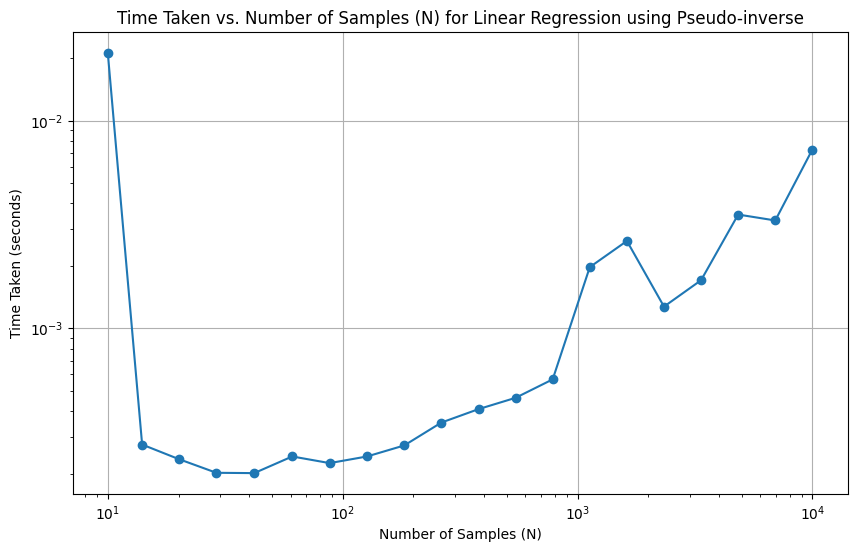

In [4]:
# Define a range of values for N (number of samples)
N_values = np.logspace(1, 4, num=20, dtype=int)

# Fixed number of features
D = 10
G = np.eye(D)
sigma = 0.1  # Noise variance
# List to store execution times
execution_times = []

# Iterate over different values of N
for N in N_values:
    # Generate synthetic data matrix
    X = generate_data_matrix(N, G)
    w = np.random.randn(D + 1)  # Weight vector
    t = generate_target_vector(X, w, sigma)  # Generate target vector

    # Measure time taken to solve linear regression using pseudo-inverse
    start_time = time.time() #Source1
    w = np.linalg.pinv(X) @ t #Source1
    end_time = time.time()

    # Append execution time to the list
    execution_times.append(end_time - start_time)

# Plot the graph #Source1
plt.figure(figsize=(10, 6))
plt.plot(N_values, execution_times, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title('Time Taken vs. Number of Samples (N) for Linear Regression using Pseudo-inverse')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Time Taken (seconds)')
plt.grid(True)
plt.show()


We can observe that there is a value of n after which the computation time increases drastically this could be due to Memory contrains and Algorithmic complexity. As the size of N increase the storing and computing the pseudo inv increase. The available memory become insufficient, leading to increased swapping between RAM and disk leading to increase in computation time.
The computational complexity of computing the pseudo-inverse using the SVD (Singular Value Decomposition) method, which is commonly used in numpy.linalg.pinv, is approximately
(
2
)
O(N⋅D
2
 ), where
N is the number of samples and
D is the number of features. While this is generally efficient, there may be a point where the computational cost becomes prohibitive for larger
N and
D.

4. Write a function to calculate the normalized root mean squared error (NRMSE) between a target
vector t and a predicted vector y.

Source: Self if not specified

In [5]:
def calculate_nrmse(t, y):

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(np.mean((t - y) ** 2))

    # Calculate range of the target vector
    target_range = np.max(t) - np.min(t) #Source1

    # Calculate NRMSE
    nrmse = rmse / target_range  #Source1

    return nrmse

# Example usage: Source1
t = np.array([1, 2, 3, 4, 5])  # Target vector
y = np.array([1.1, 1.9, 2.8, 4.2, 4.9])  # Predicted vector

nrmse = calculate_nrmse(t, y)
print("NRMSE:", nrmse)


NRMSE: 0.037080992435478334


5. Write a function to calculate gradient of mean squared error (MSE) with respect to weights of
linear regression. Figure out what should be the inputs and outputs.

- mean square error gradient requires N, y_predicted, and target vector.
- to calculate y_predicted we need w.
- so the inputs will be X, t, w.

Source : Self if not commented

In [6]:
def calculate_mse_gradient(X, t, w):

    N, D = X.shape

    # Add bias term to data matrix X as weignt   #Source1
    X_bias = np.concatenate((X, np.ones((N, 1))), axis=1)

    # Calculate predicted target values
    y = np.dot(X_bias, w)

    # Calculate gradient of MSE with respect to weights
    mse_gradient = np.dot(X_bias.T, (y - t)) * (2 / N)

    return mse_gradient

# Example usage:
N = 100  # Number of samples
D = 3    # Number of features
X = np.random.randn(N, D)  # Data matrix
t = np.random.randn(N, 1)  # Target vector
w = np.random.randn(D + 1)  # Weight vector (including bias)

mse_gradient = calculate_mse_gradient(X, t, w)
print("Gradient of MSE with respect to weights:", mse_gradient)


Gradient of MSE with respect to weights: [[-1.15064139e+00 -1.15590253e+00 -1.52199115e+00 -5.74197032e-01
  -8.27921352e-01 -1.29828475e-01 -1.59327906e+00 -8.00176136e-01
  -1.13094895e+00 -1.01128922e+00 -7.61630997e-02  7.21838764e-01
   7.33569840e-01  3.07319582e-01  7.23039811e-01 -3.15259190e-01
  -7.68587852e-01  2.00210306e+00 -6.31127291e-01 -1.12967180e+00
  -7.57448090e-02 -3.38375715e-01 -7.77774113e-01  3.47736768e-01
   4.65002295e-01  4.03167377e-01  7.60173219e-01 -1.43611659e+00
  -5.69052126e-02 -1.25832397e+00  2.21077142e-01  6.30310008e-01
  -1.30399612e+00  1.84868261e-02 -1.00389418e+00 -3.74596075e-02
  -3.48143146e-01 -1.32457321e-01  6.64902726e-01 -1.96855013e-01
  -1.73231645e+00 -1.65642318e+00  2.24002898e-01  4.24847455e-01
  -8.10370894e-01 -7.19106373e-01  3.67016647e-01  8.35983730e-01
  -1.62000407e-01  3.59802460e-01 -3.64371637e-01 -6.55341219e-01
   1.65317004e-01  2.20961107e-02  2.40032084e-01 -6.09936093e-01
  -5.66968897e-01 -2.35153348e-01  

6. Write a function to calculate gradient of L2 norm of weights with respect to weights.
- L2 norm is basically the squared sum of entries of w vector.
- taking its gradient gives 2*w

Source: Self

In [7]:
def calculate_l2_norm_gradient(w):

    # Calculate gradient of L2 norm with respect to weights
    l2_norm_gradient = 2 * w

    return l2_norm_gradient

# Example usage:
w = np.array([1, 2, 3, 4])  # Weight vector

l2_norm_gradient = calculate_l2_norm_gradient(w)
print("Gradient of L2 norm with respect to weights:", l2_norm_gradient)


Gradient of L2 norm with respect to weights: [2 4 6 8]


7. Write a function to calculate gradient of L1 norm of weights with respect to weights.
- L1 norm is the absolute sum of each entry of w vector.
- its gradient will be a vector contaning the sign of the w(i)

Source : self

In [8]:
def calculate_l1_norm_gradient(w):

    l1_norm_gradient = np.sign(w) # Source_1 calculating the l1_norm_gradient
    return l1_norm_gradient

# Example usage:
w = np.array([1, -2, 3, 0, -4])  # Weight vector

l1_norm_gradient = calculate_l1_norm_gradient(w)
print("Subgradient of L1 norm with respect to weights:", l1_norm_gradient)


Subgradient of L1 norm with respect to weights: [ 1 -1  1  0 -1]


- L1 Norm is basically the sum of norm of each component of the vector
- when we differentiate it w.r.t each feature then we get the sign of each in the output vector

8. Write a function to perform gradient descent on MSE + λ1 L1 + λ2 L2 for linear regression. Use an
appropriate stopping criterion.

Source: "self" if not commented

In [9]:
def gradient_descent_regularized(X, t, lambda1, lambda2, learning_rate, max_iters, tol):

    N, D = X.shape
    w = np.zeros((D, 1))  # Initialize weights to zeros
    prev_loss = float('inf')  # Source_1 # Initialize previous loss to infinity

    for i in range(max_iters):
        # Calculate predicted target values
        y = np.dot(X, w)

        # Calculate gradients of MSE, L1, and L2 regularization terms
        mse_gradient = 2 * np.dot(X.T, (y - t)) / N
        l1_reg_gradient = lambda1 * np.sign(w)
        l2_reg_gradient = 2 * lambda2 * w

        # Total gradient
        total_gradient = mse_gradient + l1_reg_gradient + l2_reg_gradient
        # print(total_gradient.shape)
        a=learning_rate*total_gradient
        learning_rate = float(learning_rate)
        # Update weights
        w -= learning_rate * total_gradient
        # print("Shape of w:", w.shape)
        # print("Shape of total_gradient:", total_gradient.shape)
        # print("Data type of learning_rate:", type(learning_rate))
        # print("Value of learning_rate:", learning_rate)

        # Calculate loss
        loss = np.mean((y - t) ** 2) + lambda1 * np.sum(np.abs(w)) + lambda2 * np.sum(w ** 2) # Source_1

        # Check for convergence (Source_1)
        if np.abs(prev_loss - loss) < tol:
            break

        # Update previous loss
        prev_loss = loss

    return w

# Example usage:
N = 100  # Number of samples
D = 3    # Number of features
X = np.random.randn(N, D)  # Data matrix
t = np.random.randn(N, 1)  # Target vector
lambda1 = 0.01  # L1 regularization hyperparameter
lambda2 = 0.01  # L2 regularization hyperparameter
learning_rate = 0.01  # Learning rate for gradient descent
max_iters = 1000  # Maximum number of iterations
tol = 1e-6  # Tolerance for stopping criterion

optimal_weights = gradient_descent_regularized(X, t, lambda1, lambda2, learning_rate, max_iters, tol)
print("Optimal weights:", optimal_weights)


Optimal weights: [[ 0.0365516 ]
 [-0.00192215]
 [ 0.0105247 ]]


9. Examine the impact of σ on the NRMSE for linear regression using gradient descent. Average the
results of the following experiment run five times for each value of σ where G is an identity matrix.
Generate a random data matrix X and target vector t with noise variance σ, and split it into training
and validation sub-matrices and sub-vectors. Train using gradient descent on training subset, and
test on the validation subset. Plot average NRMSE on validation subset for five runs versus σ.
Comment on the results.

Source : "Self" if not commented

In [10]:
def split_data(X, t, train_ratio=0.8):

    N = X.shape[0]
    train_size = int(N * train_ratio)
    X_train, t_train = X[:train_size], t[:train_size] # Source_1 distribute the train and test set
    X_val, t_val = X[train_size:], t[train_size:]
    return X_train, t_train, X_val, t_val

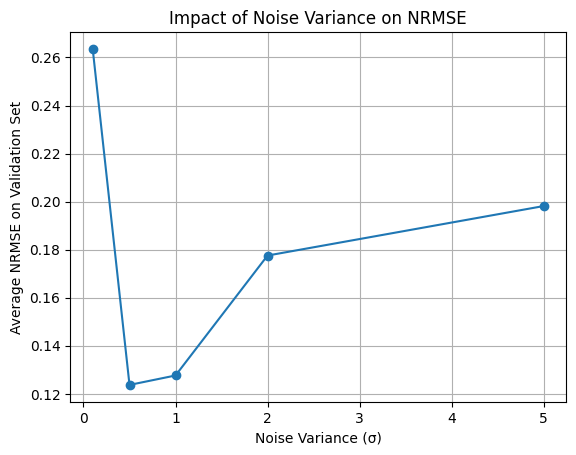

In [11]:
# Parameters
N = 100  # Number of samples
D = 5    # Number of features
M = 5   # Number of features in the generator matrix (since G is identity matrix)
# G = np.random.rand(M, D)  # Generator matrix
G = np.identity(D, dtype = float)  # Since generator matrix is identity

sigma_values = [0.1, 0.5, 1.0, 2.0, 5.0]  # Noise variance values
learning_rate = 0.01  # Learning rate for gradient descent
max_iters = 1000      # Maximum number of iterations for gradient descent
tol = 1e-6            # Tolerance for stopping criterion
train_ratio = 0.8     # Ratio of training data
lambda1 =0
lambda2 =0
# Perform experiment for each value of sigma 5 times and store avg results in an array for each sigma
average_nrmse_results = []

for sigma in sigma_values:
    nrmse_results = []
    for _ in range(5):  # Repeat experiment five times
        # Generate data
        X = generate_data_matrix(N, G)
        t = generate_target_vector(X, np.random.randn(D + 1), sigma)
        X_train, t_train, X_val, t_val = split_data(X, t, train_ratio)

        # Train model using gradient descent setting lambda1,2 = 0
        w = gradient_descent_regularized(X_train, t_train, lambda1, lambda2, learning_rate, max_iters, tol)

        # Predict on validation set
        y_val_pred = np.dot(X_val, w)

        # Calculate NRMSE
        nrmse = calculate_nrmse(t_val, y_val_pred)
        nrmse_results.append(nrmse)   # Source_1

    # Average NRMSE over the five runs
    average_nrmse = np.mean(nrmse_results)
    average_nrmse_results.append(average_nrmse)

# Plot average NRMSE versus sigma Source_1
plt.plot(sigma_values, average_nrmse_results, marker='o')
plt.xlabel('Noise Variance (σ)')
plt.ylabel('Average NRMSE on Validation Set')
plt.title('Impact of Noise Variance on NRMSE')
plt.grid(True)
plt.show()


Comment: The NRMSE increases as the noise variance is increased.This was expected as higher variance means a greater level of uncertainty or randomness in the target variable, which makes it challenging for the model to predict accurately and increases error.

10. Examine the impact of N and λ2 on the NRMSE for linear regression using gradient descent.
Create lists of N and λ2 values (use log scale, 5 each, 25 pairs). Average the results of the following
experiment run five times for combination of N and λ2 value pair for a fixed generator matrix G and
noise variance σ. Comment on the results.

Source : "self" if not commented

<ipython-input-9-945af2c0099e>:29: RuntimeWarning: overflow encountered in scalar multiply
  loss = np.mean((y - t) ** 2) + lambda1 * np.sum(np.abs(w)) + lambda2 * np.sum(w ** 2) # Source_1
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-9-945af2c0099e>:32: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(prev_loss - loss) < tol:
<ipython-input-9-945af2c0099e>:29: RuntimeWarning: overflow encountered in square
  loss = np.mean((y - t) ** 2) + lambda1 * np.sum(np.abs(w)) + lambda2 * np.sum(w ** 2) # Source_1
<ipython-input-9-945af2c0099e>:14: RuntimeWarning: overflow encountered in multiply
  l2_reg_gradient = 2 * lambda2 * w
<ipython-input-9-945af2

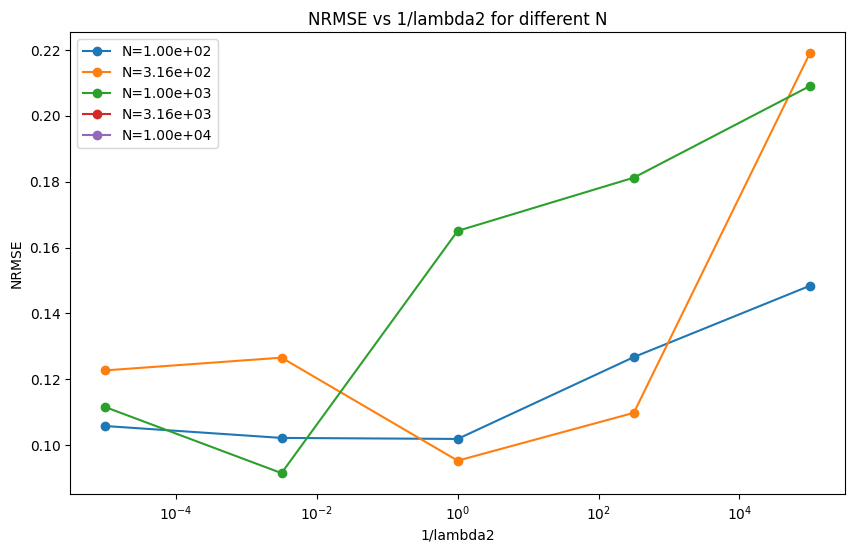

In [84]:
# Parameters
D = 5                 # Number of features
M = 5   # Number of features in the generator matrix (since G is identity matrix)
G = np.identity(D, dtype = float)  # Generator matrix
sigma = 0.5           # Noise variance
learning_rate = 0.01  # Learning rate for gradient descent
max_iters = 1000      # Maximum number of iterations for gradient descent
tol = 1e-6            # Tolerance for stopping criterion Source_1
train_ratio = 0.8     # Ratio of training data
lambda2_values = np.logspace(-5, 5, num=5)  # Lambda2 values (log scale) Source_1
N_values = np.logspace(2, 4, num=5, dtype=int)  # N values (log scale) Source_1
lambda1 = 0

# Perform experiment for each combination of N and lambda2
average_nrmse_results = np.zeros((len(N_values), len(lambda2_values)))  #matrix initialized with zeros

for i, N in enumerate(N_values):
    for j, lambda2 in enumerate(lambda2_values):
        nrmse_results = []
        for _ in range(5):  # Repeat experiment five times
            # Generate data
            X = generate_data_matrix(N, G)
            t = generate_target_vector(X, np.random.randn(D + 1), sigma)
            X_train, t_train, X_val, t_val = split_data(X, t, train_ratio)

            # Train model using gradient descent
            w = gradient_descent_regularized(X_train, t_train, lambda1, lambda2, learning_rate, max_iters, tol)

            # Predict on validation set
            y_val_pred = np.dot(X_val, w)

            # Calculate NRMSE
            nrmse = calculate_nrmse(t_val, y_val_pred)
            nrmse_results.append(nrmse)

        # Average NRMSE over the five runs
        average_nrmse = np.mean(nrmse_results)
        average_nrmse_results[i, j] = average_nrmse

# Plot average NRMSE versus N and lambda2 (Source_1)  vary lambda and show plot for a fixed N, x axis should be 1/lambda2 y should be NRMSE for fixed N
plt.figure(figsize=(10, 6))
for j, N in enumerate(N_values):
    plt.plot(1/lambda2_values, average_nrmse_results[:, j], marker='o', label=f'N={N:.2e}')  # taking the jth entry of "average_nrmse_results" out of N_values Source_1

plt.xlabel('1/lambda2')
plt.ylabel('NRMSE')
plt.xscale('log')
plt.title('NRMSE vs 1/lambda2 for different N')
plt.legend()
plt.show()

As N increases the avg. NRMSE decreases as larger datasets provide more information for the model to learn from, which leads better predictions.

The observed decrease in NRMSE with increasing λ2 suggests that regularization is playing a beneficial role in improving the performance of the linear regression model

11. Examine the impact of λ1 on variable elimination. Generate a single data matrix X and plot
weights versus 1/λ1. Comment on the results. Introduce correlations in the columns of X and repeat
the experiment. Are the results different? Comment on the results.

Source : self if not commented

In [85]:
def plot_weights_vs_lambda1(X, t, min_lambda, max_lambda, num_lambdas, learning_rate, max_iters, tol):
    lambda_values = np.linspace(min_lambda, max_lambda, num_lambdas)
    weights_list = []
    for lambda_val in lambda_values:
        print(lambda_val)
        # Fit linear regression with regularization parameter lambda_val
        w = gradient_descent_regularized(X, t, lambda_val, 0, learning_rate, max_iters, tol)
        # Store weights
        weights_list.append(w)

    # Plot weights versus 1/lambda
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[1] ):
        weights = [w[i] for w in weights_list]
        plt.plot( 1/lambda_values, weights, label=f'Weight {i+1}')

    plt.xlabel('1/λ')
    plt.ylabel('Weights')
    plt.title('Impact of λ1 on Variable Elimination')
    plt.legend()
    plt.grid(True)
    plt.show()
    return

0.1
0.6210526315789474
1.142105263157895
1.6631578947368424
2.18421052631579
2.7052631578947373
3.2263157894736847
3.747368421052632
4.268421052631579
4.7894736842105265
5.310526315789474
5.831578947368421
6.352631578947369
6.873684210526316
7.394736842105264
7.915789473684211
8.436842105263159
8.957894736842105
9.478947368421053
10.0


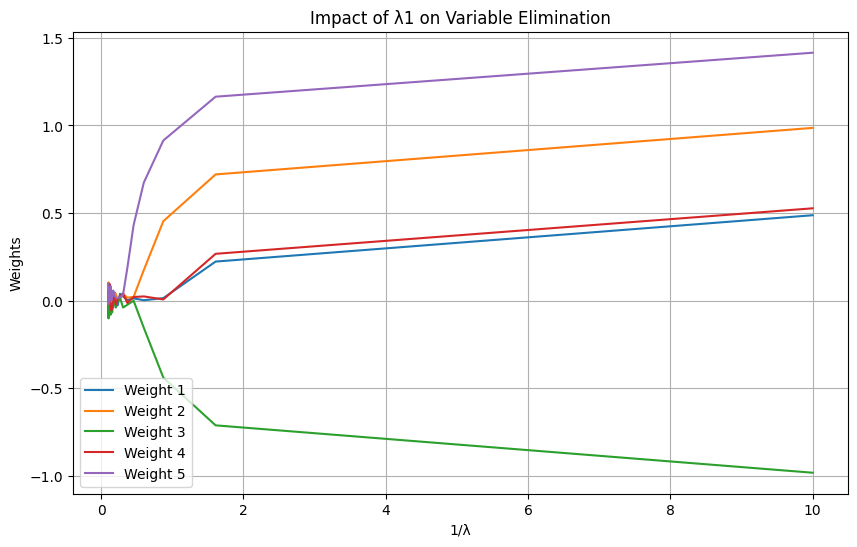

In [86]:

# Generate data
N = 1000  # Number of data points
D = 5  # Number of features (excluding bias term)
G = np.identity(D, dtype = float)  # Generator matrix
X = generate_data_matrix(N, G)
max_iters = 1000      # Maximum number of iterations for gradient descent
tol = 1e-6            # Tolerance for stopping criterion
sigma = 0.5
learning_rate = 0.01

w = np.random.randn((D+1))
# Generate true labels
t = generate_target_vector(X, w, sigma)

# Plot weights versus 1/lambda without correlations
plot_weights_vs_lambda1(X, t, 0.1, 10, 20, learning_rate, max_iters, tol)

# Plot weights versus 1/lambda with correlations
# plot_weights_vs_lambda1(X, y, 0.1, 10, 20, learning_rate, max_iters, tol, correlated=True)


In [87]:
def generate_correlated_data(N, D, correlation_strength):
    # Generate random covariance matrix with correlations
    cov_matrix = np.eye(D) + correlation_strength * (np.ones((D, D)) - np.eye(D))   #Source1
    # Generate correlated data points
    X = np.random.multivariate_normal(mean=np.zeros(D), cov=cov_matrix, size=N)     #Source1
    return X

# Example usage:
N = 1000  # Number of data points
D = 5  # Number of features
correlation_strength = 0.5  # Strength of correlation between features

X_correlated = generate_correlated_data(N, D, correlation_strength)

0.1
0.6210526315789474
1.142105263157895
1.6631578947368424
2.18421052631579
2.7052631578947373
3.2263157894736847
3.747368421052632
4.268421052631579
4.7894736842105265
5.310526315789474
5.831578947368421
6.352631578947369
6.873684210526316
7.394736842105264
7.915789473684211
8.436842105263159
8.957894736842105
9.478947368421053
10.0


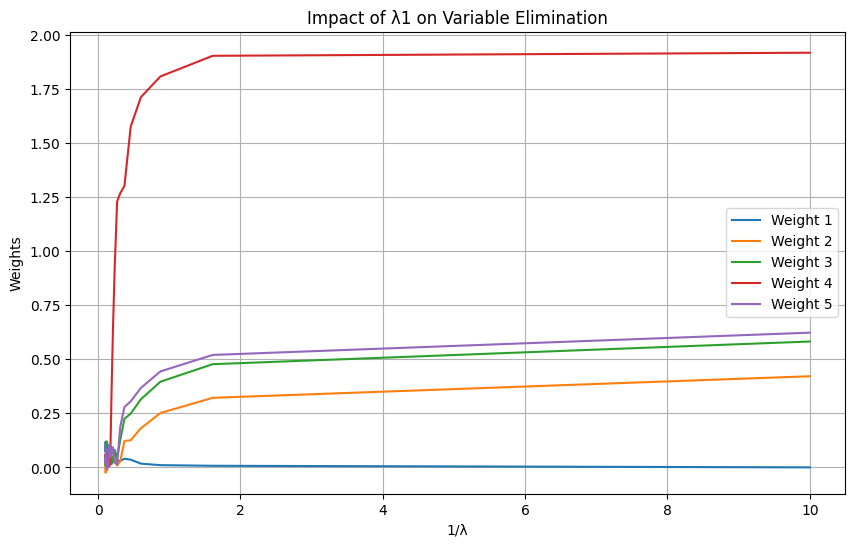

In [88]:
N = 1000  # Number of data points
D = 5  # Number of features
correlation_strength = 0.8  # Strength of correlation between features
num_duplicates = 2
max_iters = 1000      # Maximum number of iterations for gradient descent
tol = 1e-6            # Tolerance for stopping criterion
sigma = 0.5
learning_rate = 0.01


# Repeat columns to introduce duplicates
X = generate_correlated_data(N, D, correlation_strength)
w = np.random.randn((D+1))
# Generate true labels
t = generate_target_vector(X, w, sigma)

# Plot weights versus 1/lambda without correlations
plot_weights_vs_lambda1(X, t, 0.1, 10, 20, learning_rate, max_iters, tol)



Observation: As 1/lambda1 decreases the effect of regulariztion increases, This leads to stronger penalization of coefficients, causing some of them to shrink towards zero. Features with smaller weights are eliminated from the model as lambda1 increases.

Correlated vs non correlated X
- Both are not similar
- Highly correlated features are either all retained or all eliminated together as 1/lambda decrease.
- Highly correlated features tend to have similar weights
- Whereas this is not the case with non correlated X.

12. Show the grouping effect of elastic net on correlated columns of X.


Source: "Self" if not commented

(5, 1)


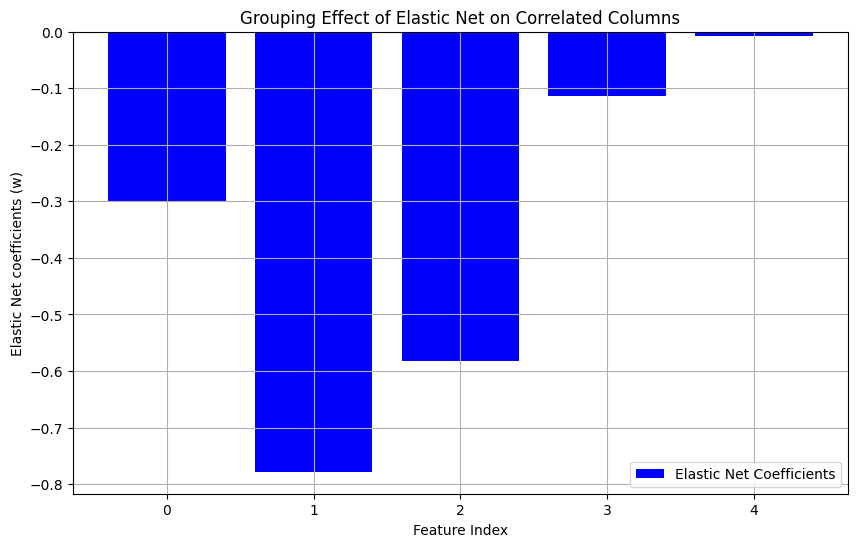

In [82]:
# Generate correlated logistic regression data
N = 1000  # Number of data points
D = 5  # Number of features
correlation_strength = 0.8  # Strength of correlation between features
sigma = 0.5
tol = 1e-6   #tolerance
w = np.random.randn(D+1) #initalizing w with random values
# Generating data
X = generate_correlated_data(N, D, correlation_strength)
t = generate_target_vector(X, w, sigma)

# Train logistic regression model with elastic net regularization
lambda1 = 0.5  # Regularization strength
lambda2 = 0.5
learning_rate = 0.01  # Learning rate
max_iters = 1000  # max number of epochs for gradient descent
w = gradient_descent_regularized(X, t, lambda1, lambda2, learning_rate, max_iters, tol)
print(w.shape)

# Plot coefficients #Source_1
plt.figure(figsize=(10, 6))
plt.bar(np.arange(D), w.flatten(), color='blue', label='Elastic Net Coefficients')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Feature Index')
plt.ylabel('Elastic Net coefficients (w)')
plt.title('Grouping Effect of Elastic Net on Correlated Columns')
plt.legend()
plt.grid(True)
plt.show()


- If two columns of X are highly correlated, then their corresponding coefficients in (w) will be similar

- Both of their corresponding coefficients in (w) are likely to be non-zero. This is because Elastic Net encourages sparsity, but it also allows for groups of correlated columns to be included in the model

 13. Write a function for generating linear binary classification vector t with noise variance σ.

 - Generate a feature matrix X of size N×D, where N is the number of samples and D is the number of features.
 - Generate a weight vector
w of size
D×1 and a bias term b.
 - Calculate the dot product of X and w, add the bias term b.
 - Add the noise term
 - Threshold the value obtained to 0 or 1

Soucre : "self" if not commented

In [83]:
def binary_classification_target_vector(X, w, sigma):

    N, D = X.shape

    # Check for dimension mismatch
    if D+1 != len(w):
        raise ValueError("Dimension mismatch between X and w")

    # Multiply X with w and add the bais
    t = np.dot(X, w[:-1]) + w[-1]

    # Add zero-mean Gaussian noise with variance sigma
    noise = np.random.normal(loc=0, scale=np.sqrt(sigma), size=(N,))  # generate a gaussain noise array of size N
    t = t.reshape(-1, 1)  #Source_1 to prevent dimention mismatch
    t += noise.reshape(-1, 1)  # Reshape to column vector
    # Thresholding t as 0 or 1 #Source_1
    binary_t = (t>0).astype(int)  # (t>0) creates a boolean array and astype(int) convert it into an integer array where False=0 and True=1
    return binary_t

# Example usage:
N = 100  # Number of samples
D = 3    # Number of features
X = np.random.randn(N, D)  # Data matrix random
w = np.random.randn((D+1))  # Weight vector random
sigma = 0.1  # Noise variance

t = binary_classification_target_vector(X, w,sigma)
print("Target vector t shape:", t.shape)
print("Target vector t", t)

Target vector t shape: (100, 1)
Target vector t [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


- For binary classification problem the output is contrained to either 0 or 1
- so we use the sigmoid function

14. Write a function for computing gradient of binary cross-entropy for logistic regression.

Source : self if not commented

- Binary cross entropy is given as BCE(y
pred
​
 ,y
true
​
 )=−
1/N
​
 ∑
​
 [y
true
(i)
​
 ⋅log(y
pred
(i)
​
 )+(1−y
true
(i)
​
 )⋅log(1−y
pred
(i)
​
 )]



In [31]:
def binary_cross_entropy_gradient(X, t, w):

    N, D = X.shape

    # Calculate the sigmoid function
    z = np.dot(X, w)
    sigmoid = 1 / (1 + np.exp(-z))
    y_pred = sigmoid
    # Compute the gradient of binary cross-entropy loss function
    gradient = np.dot(X.T, y_pred - y) / N   #Source_1

    return gradient


15. Repeat experiment 10 for binary classification.


Source : Self if not commented

In [32]:
def gradient_descent_binary_regularized(X, t, lambda1, lambda2, learning_rate, max_iters, tol):
    N, D = X.shape
    w = np.zeros((D+1, 1))  # Initialize weights to zeros
    prev_loss = float('inf')  # Source_1 # Initialize previous loss to infinity

    for i in range(max_iters):
        # Calculate predicted target values
        z = np.dot(X, w[:-1]) + w[-1]
        sigmoid = 1 / (1 + np.exp(-z))
        y_pred = sigmoid


        # Calculate gradients of binary cross-entropy loss function, L1, and L2 regularization terms

        gradient = np.dot(X.T, y_pred - t) / N   #Source_1
        l1_reg_gradient = lambda1 * np.sign(w[:-1]) #Source_1
        l2_reg_gradient = 2 * lambda2 * w[:-1] #Source_1

        # Total gradient
        total_gradient = gradient + l1_reg_gradient + l2_reg_gradient

        # Update weights
        w[:-1] -= learning_rate * total_gradient

        # Calculate loss
        epsilon = 1e-15  # Small value to avoid numerical instability in log
        loss = -np.mean(t * np.log(sigmoid + epsilon) + (1 - t) * np.log(1 - sigmoid + epsilon)) + 0.5 * lambda2 * np.linalg.norm(w[:-1])**2 # Compute BCE loss + Regularization term # Source_1

        # Check for convergence (Source_1)
        if np.abs(prev_loss - loss) < tol:
            break

        # Update previous loss
        prev_loss = loss

    return w

# Example usage:
N = 100  # Number of samples
D = 3    # Number of features
X = np.random.randn(N, D)  # Data matrix
t = np.random.randn(N, 1)  # Target vector
lambda1 = 0.01  # L1 regularization hyperparameter
lambda2 = 0.01  # L2 regularization hyperparameter
learning_rate = 0.01  # Learning rate for gradient descent
max_iters = 1000  # Maximum number of iterations
tol = 1e-6  # Tolerance for stopping criterion

optimal_weights = gradient_descent_binary_regularized(X, t, lambda1, lambda2, learning_rate, max_iters, tol)
print(optimal_weights.shape)
print("Optimal weights:", optimal_weights)



(4, 1)
Optimal weights: [[ 0.33697454]
 [ 0.425575  ]
 [-0.7521792 ]
 [ 0.        ]]


In [78]:
def calculate_accuracy(y_true, y_pred):

    no_of_correct_predictions = np.sum(y_true == y_pred) # sum up the number of times prdictions are correct #Source_1
    total_examples = len(y_true)                   # get the total no. of predictions
    accuracy = no_of_correct_predictions / total_examples
    return accuracy

- Accuracy = Number of correct predictions / Total no. of predictions
- We want to plot validation accuracy vs 1/lambda2 for 5 different N values.
- for each value of lambda we take 5 itterations and fing the avg. accuracy


[15, 25, 40, 50, 75]


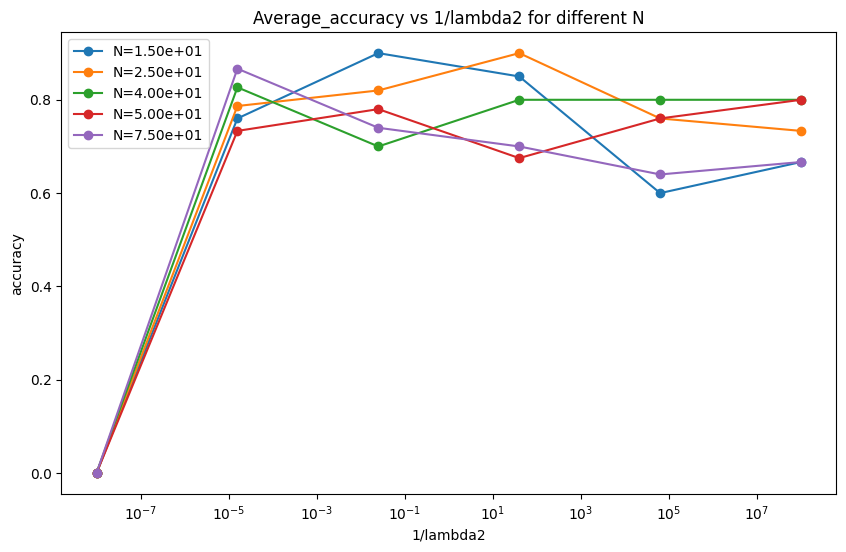

In [81]:
# Parameters
D = 5                 # Number of features
M = 5   # Number of features in the generator matrix (since G is identity matrix)
G = np.identity(D, dtype = float)  # Generator matrix
sigma = 0.5
lambda1=0         # Noise variance
learning_rate = 0.00001  # Learning rate for gradient descent
max_iters = 1000      # Maximum number of iterations for gradient descent
tol = 1e-6            # Tolerance for stopping criterion
train_ratio = 0.8     # Ratio of training data
lambda2_values = np.logspace(-8, 8, num=6)  # Lambda2 values (log scale)
# N_values = np.logspace(2, 2.5, num=5, dtype=int)  # N values (log scale)
N_values=[15,25,40,50,75,100]
# Perform experiment for each combination of N and lambda2
average_accuracy_results = np.zeros((len(N_values), len(lambda2_values)))

for i, N in enumerate(N_values[:-1]):
    for j, lambda2 in enumerate(lambda2_values[:-1]):
        accuracy_results = []
        for _ in range(5):  # Repeat experiment five times
            # Generate data
            X = generate_data_matrix(N, G)
            w = np.random.randn(D + 1)
            t = binary_classification_target_vector(X, w, sigma)
            X_train, t_train, X_val, t_val = split_data(X, t, train_ratio)

            # Train model using gradient descent
            w = gradient_descent_binary_regularized(X_train, t_train, lambda1, lambda2, learning_rate, max_iters, tol)

            # Predict on validation set
            z = np.dot(X_val, w[:-1]) + w[-1]  # Compute linear logits
            # sigmoid = 1 / (1 + np.exp(-z))  # Compute sigmoid probabilities
            y_pred = (z >= 0).astype(int) # Thereshold to predict binary labels
            # Calculate accuracy
            accuracy = calculate_accuracy(t_val, y_pred)
            accuracy_results.append(accuracy)

        # Average accuracy over the five runs
        average_accuracy= np.mean(accuracy_results)
        average_accuracy_results[i, j] = average_accuracy

print(N_values[:-1])
# Plot average BCE versus N and lambda2    vary lambda and show plot for a fixed N, x axis should be 1/lambda2 y should be NRMSE for fixed N
plt.figure(figsize=(10, 6))

#Source_1
for j, N in enumerate(N_values[:-1]):
    plt.plot(1/lambda2_values, average_accuracy_results[:,j], marker='o', label=f'N={N:.2e}')  # taking the jth entry of "average_accuracy_results" out of N_values

plt.xlabel('1/lambda2')
plt.ylabel('accuracy')
plt.xscale('log')
plt.title('Average_accuracy vs 1/lambda2 for different N')
plt.legend()
plt.show()